# Install and load necesary packages

In [1]:
# Please don't change this cell

import pandas as pd
import numpy as np  

import warnings
warnings.filterwarnings("ignore")

## Load the dataset using pandas

In [2]:
# Please don't change this cell
df = pd.read_csv('ml-100k/u.data', names=['user_id', 'item_id', 'rating', 'timestamp'], sep='\t')

df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Split dataset


## Randomly select one rating from each user as test set

In [3]:
# please do not change this cell

from sklearn.model_selection import train_test_split

n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print(str(n_users) + ' users')
print(str(n_items) + ' items')

train_df, test_df = train_test_split(df, test_size=0.2, random_state = 10)
train_df, test_df

# Training Dataset
train_ds = np.zeros((n_users, n_items))
item_popularity = np.zeros(n_items)
for row in train_df.itertuples():
    train_ds[row[1]-1, row[2]-1] = row[3]
    item_popularity[row[2]-1] =  item_popularity[row[2]-1] + 1
#train_ds = pd.DataFrame(train_ds)

# Testing Dataset
testsize = 0
test_ds = np.zeros((n_users, n_items))
for row in test_df.itertuples():
    if item_popularity[row[2]-1] > 30:
        test_ds[row[1]-1, row[2]-1] = row[3]
        testsize = testsize + 1
#test_ds = pd.DataFrame(test_ds)

print("Construct the rating matrix based on train_df:")
print(train_ds)

print("Construct the rating matrix based on test_df:")
print(test_ds)

print("Testsize = " + str(testsize))

943 users
1682 items
Construct the rating matrix based on train_df:
[[0. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
Construct the rating matrix based on test_df:
[[5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testsize = 17678


# MAE and RMSE Utils

In [4]:
# Please don't change this cell
# you can use this devaluate Utils here, and you can also implement your own MAE and RMSE calculation. 

EPSILON = 1e-9

def evaluate(test_ds, predicted_ds):
    '''
    Function for evaluating on MAE and RMSE
    '''
    # MAE
    mask_test_ds = test_ds > 0
    MAE = np.sum(np.abs(test_ds[mask_test_ds] - predicted_ds[mask_test_ds])) / np.sum(mask_test_ds.astype(np.float32))

    # RMSE
    RMSE = np.sqrt(np.sum(np.square(test_ds[mask_test_ds] - predicted_ds[mask_test_ds])) / np.sum(mask_test_ds.astype(np.float32)))

    return MAE, RMSE

# Your Solution for Method 1

In [5]:
# Write your code here for Method 1
# You are required to implement the required solution 1 here. 
# Then, evaluate your implementation by predicting the ratings in the test set (test_ds).
# Finally, save the corresponding MAE and RMSE of your implementation 
# into the following defined corresponding variable. 

MAE_solution1 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.
RMSE_solution1 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.



In [6]:
#Step 1: Calculation of mean ratings of users

user_averages=np.zeros(n_users)

In [7]:
for i in range(n_users):
    user_ratings=train_ds[i,:]
    reviewed=user_ratings[user_ratings>0]
    if len(reviewed)>0:
        user_averages[i]=reviewed.mean()
    else:
        user_averages[i]=0

In [8]:
#Step 2: Creation of predicted_ds matrix filled with user averages

user_predicted_ds=np.zeros((n_users,n_items))

In [9]:
for i in range(n_users):
    for j in range(n_items):
        if test_ds[i,j]>0:
            user_predicted_ds[i,j]=user_averages[i] if user_averages[i]>0 else train_ds[train_ds>0].mean()

In [10]:
#Step 3: Computation of MAE and RMSE using evaluated() function

MAE_solution1,RMSE_solution1=evaluate(test_ds,user_predicted_ds)

In [11]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution1, RMSE_solution1))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.8258905090105331, RMSE: 1.031143070595138


# Your Solution for Method 2

In [12]:
# Write your code here for Method 2
# You are required to implement the required solution 1 here. 
# Then, evaluate your implementation by predicting the ratings in the test set (test_ds).
# Finally, save the corresponding MAE and RMSE of your implementation 
# into the following defined corresponding variable. 

MAE_solution2 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.
RMSE_solution2 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.


In [13]:
#Step 1: Calculation of mean ratings of users

item_averages=np.zeros(n_items)

In [14]:
for i in range(n_items):
    item_ratings=train_ds[:,i]
    reviewed_by_users=item_ratings[item_ratings>0]
    if len(reviewed_by_users)>0:
        item_averages[i]=reviewed_by_users.mean()
    else:
        item_averages[i]=0

In [15]:
#Step 2: Creation of predicted_ds matrix filled with item averages

item_predicted_ds=np.zeros((n_users,n_items))

In [16]:
for i in range(n_users):
    for j in range(n_items):
        if test_ds[i,j]>0:
            item_predicted_ds[i,j]=item_averages[j] if item_averages[j]>0 else train_ds[train_ds>0].mean()

In [17]:
#Step 3: Computation of MAE and RMSE using evaluated() function

MAE_solution2,RMSE_solution2=evaluate(test_ds,item_predicted_ds)

In [18]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution2, RMSE_solution2))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.7961203950990416, RMSE: 1.0013142101585724


# Your Solution for Method 3

In [19]:
# Write your code here for Method 3
# You are required to implement the required solution 1 here. 
# Then, evaluate your implementation by predicting the ratings in the test set (test_ds).
# Finally, save the corresponding MAE and RMSE of your implementation 
# into the following defined corresponding variable. 

MAE_solution3 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.
RMSE_solution3 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.


In [20]:
# Step 0: Initialising prediction matrix and K=5 for User based KNN CF

K=5
user_predicted_ds=np.zeros((n_users,n_items))

In [21]:
#Step 1: Pre-computing user-user cosine simiarity matrix

similarity_matrix=np.zeros((n_users,n_users))

In [22]:
for i in range(n_users):
    for j in range(n_users):
        if i!=j:
            #Cosine sim: dot(A,B)/(||A||*||B||)
            dot=0
            norm_i=0
            norm_j=0
            for u in range(n_items):
                dot+=train_ds[i,u]*train_ds[j,u]
                norm_i+=(train_ds[i,u])**2
                norm_j+=(train_ds[j,u])**2

            if norm_i>0 and norm_j>0:
                similarity_matrix[i,j]=dot/((norm_i**0.5)*(norm_j**0.5))
            else:
                similarity_matrix[i,j]=0

In [23]:
#Step 2: Prediction of ratings using top K neighbours

for u in range(n_users):
    for i in range(n_items):
        if test_ds[u,i]>0:
            similarity=similarity_matrix[u]

            #Finding users who rated item i
            neighbours=[]

            for v in range(n_users):
                if train_ds[v,i]>0 and v!=u:
                    neighbours.append((v,similarity[v]))

            neighbours.sort(key=lambda x:x[1],reverse=True)
            top_k=neighbours[:K]

            #Computing weighted average of ratings
            num=0
            den=0
            for v,sim in top_k:
                num+=sim*train_ds[v,i]
                den+=abs(sim)
            
            if den>0:
                user_predicted_ds[u,i]=num/den

            else:
                #Fallback: user u's average rating'\
                user_ratings=train_ds[u,:]
                reviewed=user_ratings[user_ratings>0]
                if len(reviewed)>0:
                    user_predicted_ds[u,i]=reviewed.mean()
                else:
                    predicted_ds[u,i]=0

In [24]:
#Step 3: calculation of MAE and RMSE using evaluate() function

MAE_solution3, RMSE_solution3=evaluate(test_ds,user_predicted_ds)

In [25]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution3, RMSE_solution3))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.8246852797930765, RMSE: 1.0431455883175202


# Your Solution for Method 4

In [26]:
# Write your code here for Method 4
# You are required to implement the required solution 1 here. 
# Then, evaluate your implementation by predicting the ratings in the test set (test_ds).
# Finally, save the corresponding MAE and RMSE of your implementation 
# into the following defined corresponding variable. 

MAE_solution4 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.
RMSE_solution4 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.


In [27]:
# Step 0: Initialising prediction matrix and K=5 for Item based KNN CF

K=5
item_predicted_ds=np.zeros((n_users,n_items))

In [28]:
#Step 1: Pre-computing user-user cosine simiarity matrix

similarity_matrix=np.zeros((n_items,n_items))

In [29]:
for i in range(n_items):
    for j in range(n_items):
        if i!=j:
            #Cosine sim: dot(A,B)/(||A||*||B||)
            dot=0
            norm_i=0
            norm_j=0
            for u in range(n_users):
                dot+=train_ds[u,i]*train_ds[u,j]
                norm_i+=(train_ds[u,i])**2
                norm_j+=(train_ds[u,j])**2

            if norm_i>0 and norm_j>0:
                similarity_matrix[i,j]=dot/((norm_i**0.5)*(norm_j**0.5))
            else:
                similarity_matrix[i,j]=0

In [30]:
#Step 2: Prediction of ratings using top K neighbours

for u in range(n_users):
    for i in range(n_items):
        if test_ds[u,i]>0:

            #Finding similar items user u has rated
            neighbours=[]

            for j in range(n_items):
                if train_ds[u,j]>0 and j!=i:
                    neighbours.append((j,similarity_matrix[i,j]))

            neighbours.sort(key=lambda x:x[1],reverse=True)
            top_k=neighbours[:K]

            #Computing weighted average of ratings
            num=0
            den=0
            for v,sim in top_k:
                num+=sim*train_ds[u,v]
                den+=abs(sim)
            
            if den>0:
                item_predicted_ds[u,i]=num/den

            else:
                #Fallback: item i's average rating
                item_ratings=train_ds[:,i]
                reviewed=item_ratings[item_ratings>0]
                if len(reviewed)>0:
                    item_predicted_ds[u,i]=reviewed.mean()
                else:
                    item_predicted_ds[u,i]=0

In [31]:
#Step 3: calculation of MAE and RMSE using evaluate() function

MAE_solution4, RMSE_solution4=evaluate(test_ds,item_predicted_ds)

In [32]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution4, RMSE_solution4))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.7570474467543845, RMSE: 0.9845081077631473


# Your Solution for Method 5

In [33]:
# Write your code here for Method 5
# You are required to implement the required solution 1 here. 
# Then, evaluate your implementation by predicting the ratings in the test set (test_ds).
# Finally, save the corresponding MAE and RMSE of your implementation 
# into the following defined corresponding variable. 

MAE_solution5 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.
RMSE_solution5 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.


In [34]:
#Step 1: Predefinition of lambda for Hybrid CF(User KNN CF + Item KNN CF)

lambda_val=0.5

In [35]:
#Step 2: Combination of predictions of User KNN CF and Item based KNN CF

predicted_ds=lambda_val*user_predicted_ds+(1-lambda_val)*item_predicted_ds

In [36]:
#Step 3: evaluation of MAE and RMSE using evaluate() function

MAE_solution5, RMSE_solution5=evaluate(test_ds,predicted_ds)

In [37]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution5, RMSE_solution5))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.7329163949933074, RMSE: 0.9362082806981588


## Performance comparison of recommender system models for different K values

### Overall Evaluvation

In [41]:
import matplotlib.pyplot as plt
import seaborn as sb

In [57]:
K=[3,5,7,10]

In [58]:
MAE_values_m3=[0.8593,0.8247,0.8074,0.795]
MAE_values_m4=[0.7783,0.757,0.7499,0.7443]
MAE_values_m5=[0.7478,0.7329,0.7272,0.7234]

In [59]:
RMSE_values_m3=[1.0953,1.0431,1.0207,1.004]
RMSE_values_m4=[1.0249,0.9845,0.9691,0.9612]
RMSE_values_m5=[0.9574,0.9362,0.9281,0.9237]

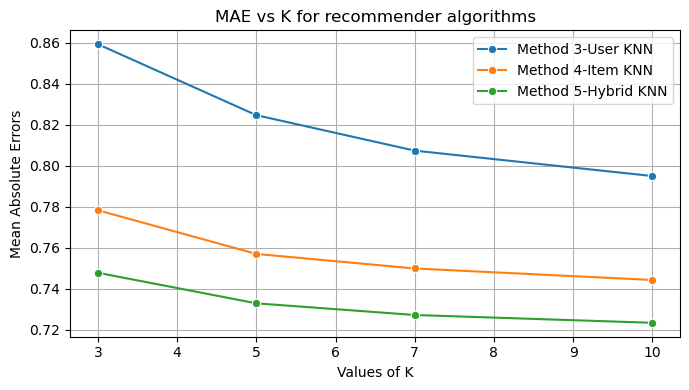

In [61]:
plt.figure(figsize=(7,4))
sb.lineplot(x=K,y=MAE_values_m3,marker="o",palette="dark",label="Method 3-User KNN")
sb.lineplot(x=K,y=MAE_values_m4,marker="o",palette="dark",label="Method 4-Item KNN")
sb.lineplot(x=K,y=MAE_values_m5,marker="o",palette="dark",label="Method 5-Hybrid KNN")
plt.grid(True)
plt.title("MAE vs K for recommender algorithms")
plt.xlabel("Values of K")
plt.ylabel("Mean Absolute Errors")
plt.tight_layout()
plt.show()

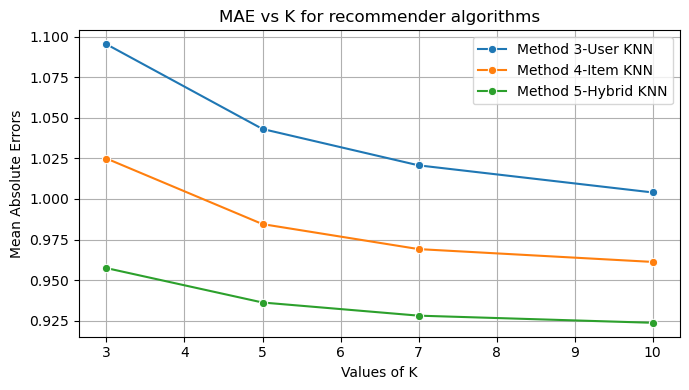

In [62]:
plt.figure(figsize=(7,4))
sb.lineplot(x=K,y=RMSE_values_m3,marker="o",palette="dark",label="Method 3-User KNN")
sb.lineplot(x=K,y=RMSE_values_m4,marker="o",palette="dark",label="Method 4-Item KNN")
sb.lineplot(x=K,y=RMSE_values_m5,marker="o",palette="dark",label="Method 5-Hybrid KNN")
plt.grid(True)
plt.title("MAE vs K for recommender algorithms")
plt.xlabel("Values of K")
plt.ylabel("Mean Absolute Errors")
plt.tight_layout()
plt.show()

### Individual EDA for different values of K

#### K=3

In [65]:
MAE_values=[0.8593,0.7783,0.7478]
RMSE_values=[1.0953,1.0249,0.9574]

In [66]:
methods=["Method 3","Method 4","Method 5"]

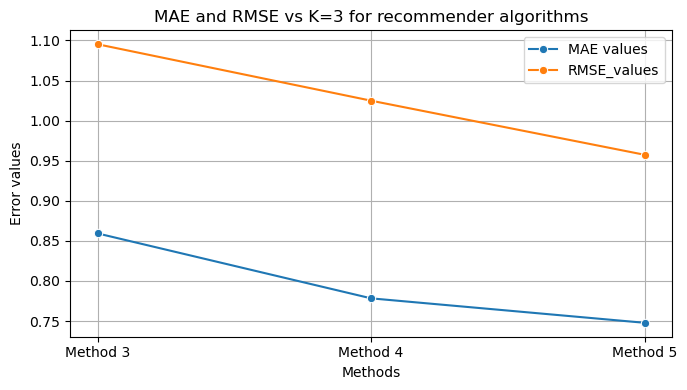

In [69]:
plt.figure(figsize=(7,4))
sb.lineplot(x=methods,y=MAE_values,marker="o",palette="dark",label="MAE values")
sb.lineplot(x=methods,y=RMSE_values,marker="o",palette="dark",label="RMSE_values")
plt.grid(True)
plt.title("MAE and RMSE vs K=3 for recommender algorithms")
plt.xlabel("Methods")
plt.ylabel("Error values")
plt.tight_layout()
plt.show()

#### K=5

In [70]:
# K=5 values for MAE and RMSE

MAE_values=[0.8247,0.757,0.7329]
RMSE_values=[1.0431,0.9845,0.9362]

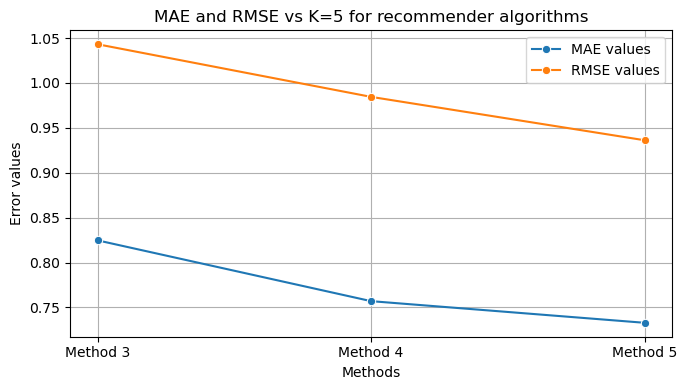

In [71]:
plt.figure(figsize=(7,4))
sb.lineplot(x=methods,y=MAE_values,marker="o",palette="dark",label="MAE values")
sb.lineplot(x=methods,y=RMSE_values,marker="o",palette="dark",label="RMSE values")
plt.grid(True)
plt.title("MAE and RMSE vs K=5 for recommender algorithms")
plt.xlabel("Methods")
plt.ylabel("Error values")
plt.tight_layout()
plt.show()

#### K=7

In [72]:
# K=7 values for MAE and RMSE

MAE_values=[0.8074,0.7499,0.7272]
RMSE_values=[1.0207,0.9691,0.9281]

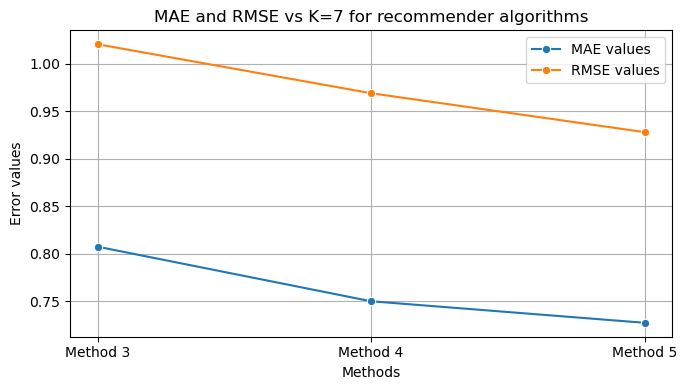

In [73]:
plt.figure(figsize=(7,4))
sb.lineplot(x=methods,y=MAE_values,marker="o",palette="dark",label="MAE values")
sb.lineplot(x=methods,y=RMSE_values,marker="o",palette="dark",label="RMSE values")
plt.grid(True)
plt.title("MAE and RMSE vs K=7 for recommender algorithms")
plt.xlabel("Methods")
plt.ylabel("Error values")
plt.tight_layout()
plt.show()

#### K=10

In [74]:
# K=10 values for MAE and RMSE

MAE_values=[0.795,0.7443,0.7234]
RMSE_values=[1.004,0.9612,0.9237]

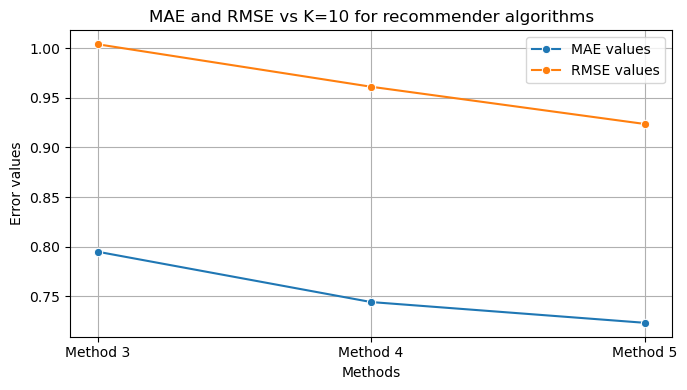

In [75]:
plt.figure(figsize=(7,4))
sb.lineplot(x=methods,y=MAE_values,marker="o",palette="dark",label="MAE values")
sb.lineplot(x=methods,y=RMSE_values,marker="o",palette="dark",label="RMSE values")
plt.grid(True)
plt.title("MAE and RMSE vs K=10 for recommender algorithms")
plt.xlabel("Methods")
plt.ylabel("Error values")
plt.tight_layout()
plt.show()